<a href="https://colab.research.google.com/github/NimsW20/TensorFlow-Tutorial/blob/main/Cats%26Dog_ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!unzip cats_and_dogs.zip

# Define paths
PATH = 'cats_and_dogs'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Print paths and contents
print("Train Directory:", train_dir)
print("Validation Directory:", validation_dir)
print("Test Directory:", test_dir)

print("Train Directory Contents:", os.listdir(train_dir))
print("Validation Directory Contents:", os.listdir(validation_dir))
print("Test Directory Contents:", os.listdir(test_dir))

# Get number of files in each directory
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

print(f"Total training images: {total_train}")
print(f"Total validation images: {total_val}")
print(f"Total test images: {total_test}")

IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 128
epochs = 15

In [25]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                     class_mode='binary', shuffle=True)
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, directory=validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                     class_mode='binary', shuffle=True)
#test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size, directory=test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                    # class_mode=None, shuffle=False, follow_links=False)
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=PATH, classes=['test'],
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="input", shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


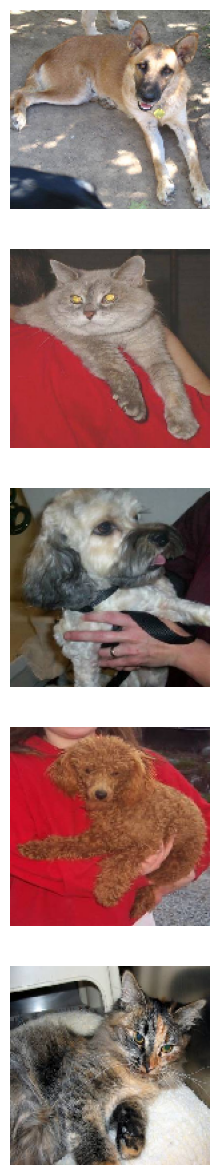

In [26]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [27]:
# 5
train_image_generator = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,
                                            shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rescale=1./255,
                                            fill_mode='nearest')


Found 2000 images belonging to 2 classes.


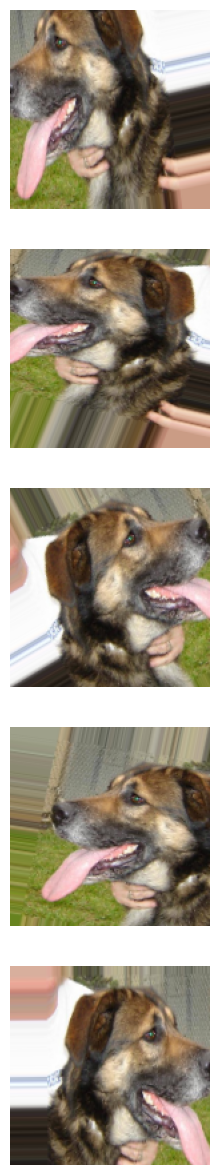

In [28]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [29]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [30]:
# 7
model = Sequential()
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64))
# model.add(Dense(1))
model.add(Dense(2))
# model.compile(optimizer='adam', metrics=['accuracy'], loss=BinaryCrossentropy(from_logits=True))
model.compile(optimizer='adam', metrics=['accuracy'], loss=SparseCategoricalCrossentropy(from_logits=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 128)      

In [31]:
total_train//batch_size, total_val//batch_size, total_train, total_val, batch_size

(15, 7, 2001, 1001, 128)

In [32]:
# 8
# train_data_gen /= 255
# validation_data /= 255
history = model.fit(train_data_gen, steps_per_epoch=total_train//batch_size, epochs=epochs,
                    validation_data=val_data_gen, validation_steps=total_val//batch_size, verbose=1)

Epoch 1/15
15/15 [==============================] - 18s 1s/step - loss: 1.2066 - accuracy: 0.5251 - val_loss: 0.6894 - val_accuracy: 0.5815
Epoch 2/15
15/15 [==============================] - 15s 1s/step - loss: 0.6894 - accuracy: 0.5214 - val_loss: 0.6794 - val_accuracy: 0.5725
Epoch 3/15
15/15 [==============================] - 15s 1s/step - loss: 0.6819 - accuracy: 0.5552 - val_loss: 0.7057 - val_accuracy: 0.5078
Epoch 4/15
15/15 [==============================] - 15s 1s/step - loss: 0.6789 - accuracy: 0.5668 - val_loss: 0.6528 - val_accuracy: 0.6562
Epoch 5/15
15/15 [==============================] - 17s 1s/step - loss: 0.6654 - accuracy: 0.5924 - val_loss: 0.6360 - val_accuracy: 0.6049
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.6623 - accuracy: 0.5791 - val_loss: 0.6278 - val_accuracy: 0.6618
Epoch 7/15
15/15 [==============================] - 16s 1s/step - loss: 0.6402 - accuracy: 0.6250 - val_loss: 0.6313 - val_accuracy: 0.6127
Epoch 8/15
15/15 [==

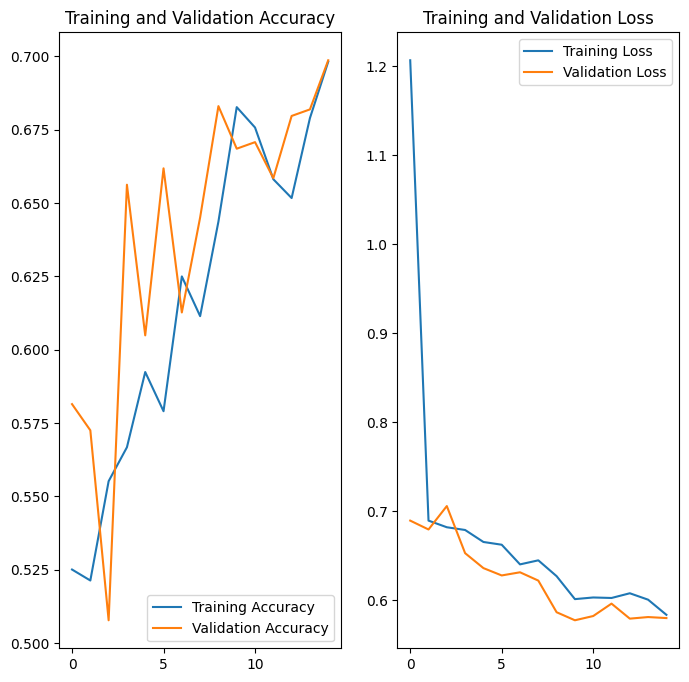

In [33]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 272ms/step


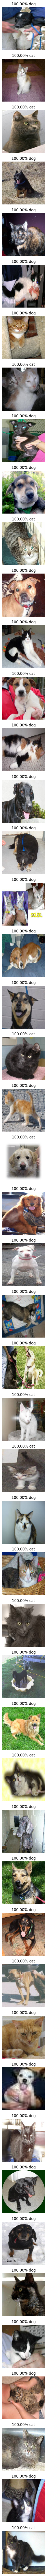

In [34]:
#10
test_images, _ = next(test_data_gen)
# print(test_images,_)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
# print(model.predict(test_data_gen))
plotImages(test_images, probabilities=probabilities)

In [35]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
